In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib notebook

<IPython.core.display.Javascript object>


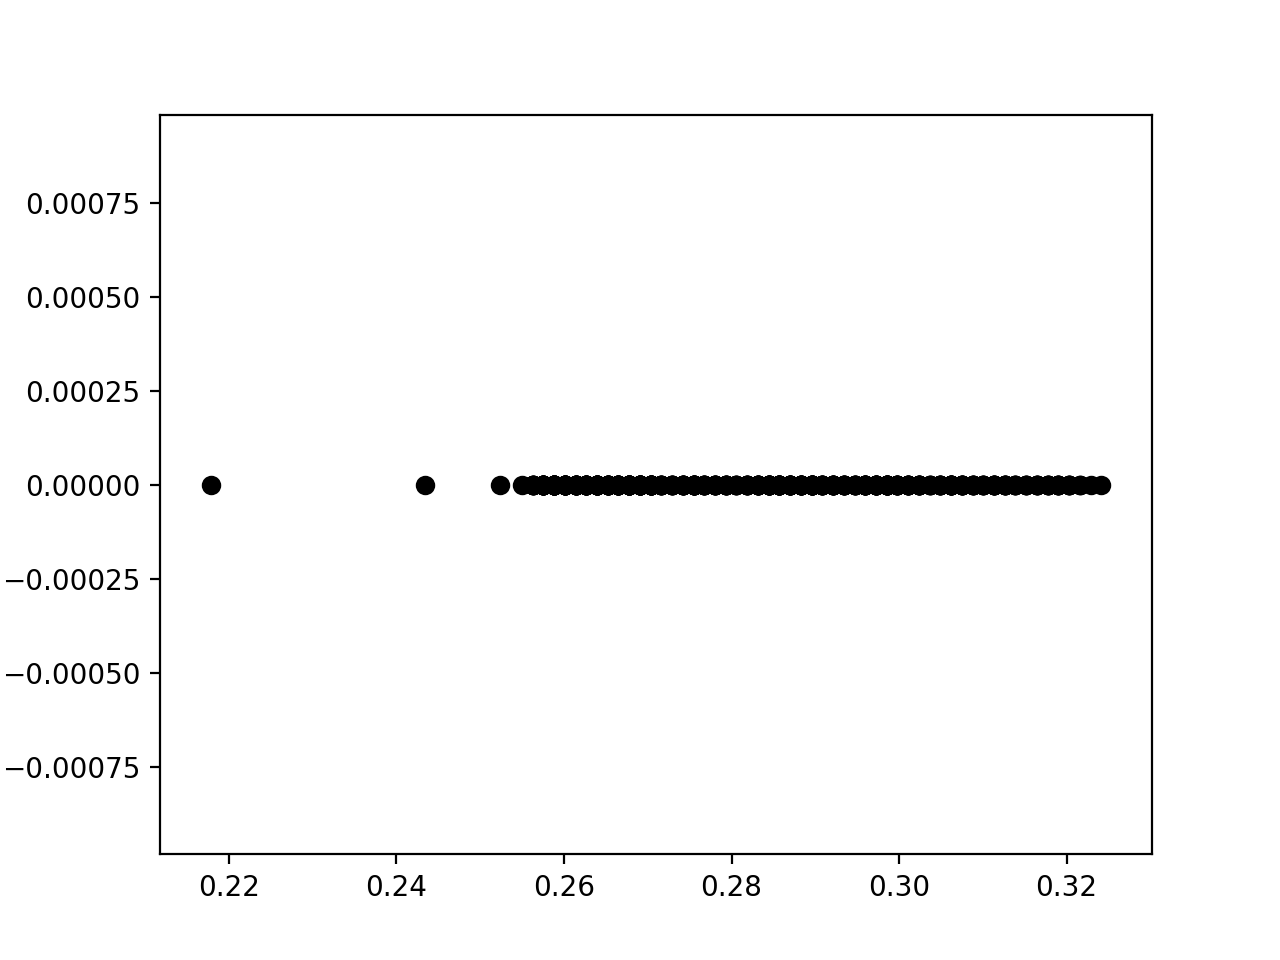

In [153]:
data=pd.read_csv("../Documents/Measurement_GMM_Ct2_2018/P1-1/EDAT.csv", sep=',',header=0,encoding='utf-8').values
stressed_data=data[data[:,1]=="stressed",:]
notstressed_data=data[data[:,1]=="Notstressed",:]
Y1 = np.zeros(len(stressed_data)).T# Assign y-axis to be zero because it is 1-dimensional 
Y2 = np.zeros(len(notstressed_data)).T#Assign y-axis to be zero because it is 1-dimensional 
X1=np.column_stack((stressed_data,Y1))
X2=np.column_stack((notstressed_data,Y2))
ax = plt.axes()
ax.scatter(X1[:,0],X1[:,2],color='red')# for stress
ax.scatter(X2[:,0],X2[:,2],color='black') # for not stress
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)
plt.show();# Shows the data sets

[[0.26290396 0.        ]
 [0.29878794 0.        ]]


<IPython.core.display.Javascript object>


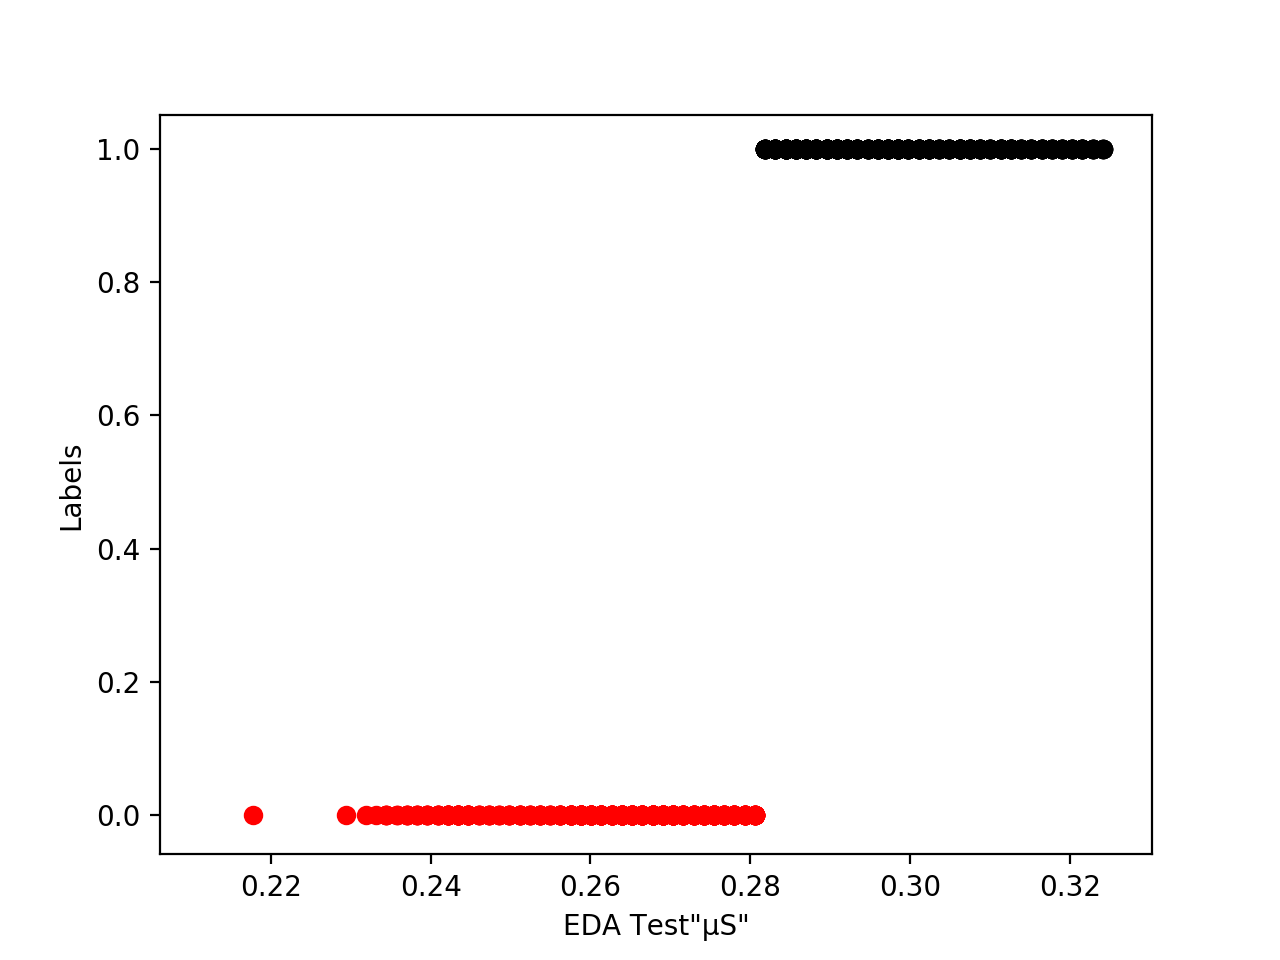

In [154]:
KMeans_data=np.column_stack((data[:,0],np.zeros(len(data)).T))
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit(KMeans_data).predict(KMeans_data)
centers = kmeans.cluster_centers_
print(centers)# Kmean centers for stress and not stress.
estimation=np.column_stack((KMeans_data,np.zeros(len(data)).T))
 
for i in range(len(estimation)):
    minimum_dist=9999;
    label=99
    for c in range(len(centers)):
        center=centers[c]
        data_pt=estimation[i]
        distance= abs(center[0]-data_pt[0])
        if(distance<minimum_dist):
            minimum_dist=distance
            label=c
    estimation[i,2]=label

class1=estimation[estimation[:,2]==0,:]# class 1 as for stress
class2=estimation[estimation[:,2]==1,:]# class 2 as for not stress


plt.figure()#GMM 
ax = plt.axes()
ax.scatter(class1[:,0],class1[:,2],color='red')# for stress
ax.scatter(class2[:,0],class2[:,2],color='black')# for not stress
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)
plt.xlabel('EDA Test"μS"')
plt.ylabel('Labels')
plt.show();